In [65]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [66]:
# folder path into a string 
path = r'C:\\Users\\Jalon\\Desktop\\python_projects'


In [67]:
#importing citibike df
df = pd.read_csv(os.path.join(path,'citibike_last.csv'))

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43019 entries, 0 to 43018
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               43019 non-null  int64  
 1   trip_id                  43019 non-null  object 
 2   weekday                  43019 non-null  int64  
 3   start_hour               43019 non-null  int64  
 4   start_time               43019 non-null  object 
 5   start_station_id         43019 non-null  int64  
 6   start_station_latitude   43019 non-null  float64
 7   start_station_longitude  43019 non-null  float64
 8   end_time                 43019 non-null  object 
 9   end_station_id           43019 non-null  int64  
 10  end_station_latitude     43019 non-null  float64
 11  end_station_longitude    43019 non-null  float64
 12  trip_duration            43019 non-null  int64  
 13  subscriber               43019 non-null  object 
 14  birth_year            

In [69]:
df.head(5)

,Unnamed: 0,trip_id,weekday,start_hour,start_time,start_station_id,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,duration_flag,age,age_flag
0,0,LnQzQk,1,18,2013-09-09 18:18:55,523,40.754666,-73.991382,2013-09-09 18:35:28,334,40.742388,-73.997262,993,Subscriber,1968.0,2,average_dur,45.0,average
1,1,IL9boN,4,18,2013-09-12 18:38:53,257,40.719392,-74.002472,2013-09-12 18:48:34,236,40.728419,-73.987140,581,Subscriber,1983.0,1,average_dur,30.0,average
2,2,46clGB,3,19,2013-09-18 19:44:04,479,40.760193,-73.991255,2013-09-18 19:50:05,513,40.768254,-73.988639,361,Subscriber,1989.0,1,short_dur,24.0,young
3,3,v7vdFt,6,11,2013-09-28 11:54:37,527,40.743156,-73.974347,2013-09-28 12:03:58,441,40.756014,-73.967416,561,Subscriber,1988.0,2,average_dur,25.0,young
4,4,HbKJBz,5,22,2013-09-27 22:01:01,293,40.730287,-73.990765,2013-09-27 22:08:08,432,40.726218,-73.983799,427,Subscriber,1986.0,2,average_dur,27.0,young


## Data Cleaning


Comment: The Data is already explored and cleaned from the previous exercices

In [70]:
df.isnull().sum()

Unnamed: 0                 0
trip_id                    0
weekday                    0
start_hour                 0
start_time                 0
start_station_id           0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
duration_flag              0
age                        0
age_flag                   0
dtype: int64

In [71]:
df.duplicated().sum()

0

In [72]:
# deleting Unnamed: 0 column
del(df["Unnamed: 0"])

In [73]:
#making an age column
df["age"] = 2013 -df["birth_year"]

In [74]:
df["age"].describe()

count    43019.000000
mean        37.371069
std         11.087987
min         16.000000
25%         29.000000
50%         35.000000
75%         45.000000
max        114.000000
Name: age, dtype: float64

In [75]:
df

,trip_id,weekday,start_hour,start_time,start_station_id,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,duration_flag,age,age_flag
0,LnQzQk,1,18,2013-09-09 18:18:55,523,40.754666,-73.991382,2013-09-09 18:35:28,334,40.742388,-73.997262,993,Subscriber,1968.0,2,average_dur,45.0,average
1,IL9boN,4,18,2013-09-12 18:38:53,257,40.719392,-74.002472,2013-09-12 18:48:34,236,40.728419,-73.987140,581,Subscriber,1983.0,1,average_dur,30.0,average
2,46clGB,3,19,2013-09-18 19:44:04,479,40.760193,-73.991255,2013-09-18 19:50:05,513,40.768254,-73.988639,361,Subscriber,1989.0,1,short_dur,24.0,young
3,v7vdFt,6,11,2013-09-28 11:54:37,527,40.743156,-73.974347,2013-09-28 12:03:58,441,40.756014,-73.967416,561,Subscriber,1988.0,2,average_dur,25.0,young
4,HbKJBz,5,22,2013-09-27 22:01:01,293,40.730287,-73.990765,2013-09-27 22:08:08,432,40.726218,-73.983799,427,Subscriber,1986.0,2,average_dur,27.0,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43014,Ayusua,6,15,2013-09-28 15:30:14,435,40.741740,-73.994156,2013-09-28 15:46:29,448,40.756604,-73.997901,975,Subscriber,1973.0,1,average_dur,40.0,average
43015,xrF3KL,0,16,2013-09-01 16:27:11,224,40.711464,-74.005524,2013-09-01 16:52:52,301,40.722174,-73.983688,1541,Subscriber,1975.0,1,long_dur,38.0,average
43016,XGB7JU,6,17,2013-09-14 17:32:26,261,40.694749,-73.983625,2013-09-14 17:52:17,151,40.721816,-73.997203,1191,Subscriber,1970.0,2,long_dur,43.0,average
43017,vFs2HS,6,18,2013-09-07 18:08:21,402,40.740343,-73.989551,2013-09-07 18:25:51,524,40.755273,-73.983169,1050,Subscriber,1961.0,2,long_dur,52.0,old


## QN4 Explore the Data visually

In [85]:
df

,trip_id,weekday,start_hour,start_time,start_station_id,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,duration_flag,age,age_flag
0,LnQzQk,1,18,2013-09-09 18:18:55,523,40.754666,-73.991382,2013-09-09 18:35:28,334,40.742388,-73.997262,993,Subscriber,1968.0,2,average_dur,45.0,average
1,IL9boN,4,18,2013-09-12 18:38:53,257,40.719392,-74.002472,2013-09-12 18:48:34,236,40.728419,-73.987140,581,Subscriber,1983.0,1,average_dur,30.0,average
2,46clGB,3,19,2013-09-18 19:44:04,479,40.760193,-73.991255,2013-09-18 19:50:05,513,40.768254,-73.988639,361,Subscriber,1989.0,1,short_dur,24.0,young
3,v7vdFt,6,11,2013-09-28 11:54:37,527,40.743156,-73.974347,2013-09-28 12:03:58,441,40.756014,-73.967416,561,Subscriber,1988.0,2,average_dur,25.0,young
4,HbKJBz,5,22,2013-09-27 22:01:01,293,40.730287,-73.990765,2013-09-27 22:08:08,432,40.726218,-73.983799,427,Subscriber,1986.0,2,average_dur,27.0,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43014,Ayusua,6,15,2013-09-28 15:30:14,435,40.741740,-73.994156,2013-09-28 15:46:29,448,40.756604,-73.997901,975,Subscriber,1973.0,1,average_dur,40.0,average
43015,xrF3KL,0,16,2013-09-01 16:27:11,224,40.711464,-74.005524,2013-09-01 16:52:52,301,40.722174,-73.983688,1541,Subscriber,1975.0,1,long_dur,38.0,average
43016,XGB7JU,6,17,2013-09-14 17:32:26,261,40.694749,-73.983625,2013-09-14 17:52:17,151,40.721816,-73.997203,1191,Subscriber,1970.0,2,long_dur,43.0,average
43017,vFs2HS,6,18,2013-09-07 18:08:21,402,40.740343,-73.989551,2013-09-07 18:25:51,524,40.755273,-73.983169,1050,Subscriber,1961.0,2,long_dur,52.0,old


In [86]:
df.columns

Index(['trip_id', 'weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'duration_flag',
       'age', 'age_flag'],
      dtype='object')

In [104]:
#making a subset with only columns im intrested in
df1 = df[[ 'weekday',  'gender', 'age','trip_duration','start_hour']]
df1.head()

,weekday,gender,age,trip_duration,start_hour
0,1,2,45.0,993,18
1,4,1,30.0,581,18
2,3,1,24.0,361,19
3,6,2,25.0,561,11
4,5,2,27.0,427,22


In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43019 entries, 0 to 43018
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weekday        43019 non-null  int64  
 1   gender         43019 non-null  int64  
 2   age            43019 non-null  float64
 3   trip_duration  43019 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.3 MB


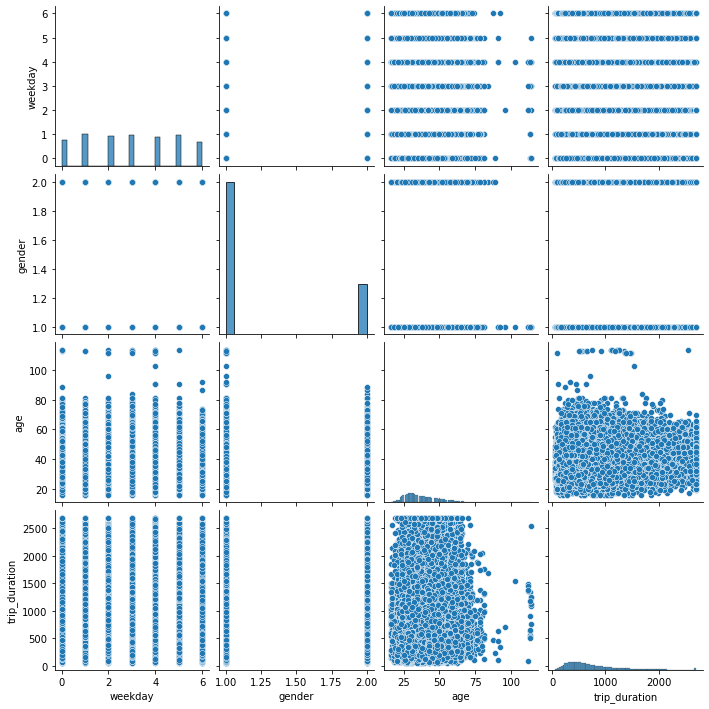

In [89]:
sns.pairplot(df1)

In [140]:
#creating a correlation matrix
df1.corr()

,weekday,gender,age,trip_duration,start_hour
weekday,1.000000,-0.013212,-0.002168,-0.004094,-0.025581
gender,-0.013212,1.000000,-0.070066,0.102868,0.013999
age,-0.002168,-0.070066,1.000000,0.047067,-0.064248
trip_duration,-0.004094,0.102868,0.047067,1.000000,0.048662
start_hour,-0.025581,0.013999,-0.064248,0.048662,1.000000


Text(0.5, 0.98, 'Correlation Matrix             ')

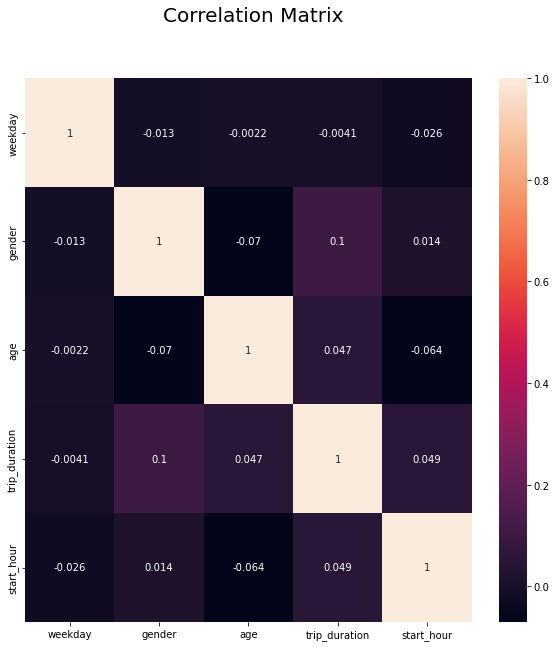

In [141]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df1.corr(), annot = True, ax = ax) 

#title
f.suptitle(('Correlation Matrix             '), fontsize=20)


<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

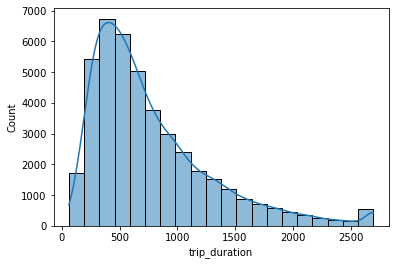

In [91]:
sns.histplot(df['trip_duration'], bins = 20, kde = True)

In [93]:
# creating a subset where trip duration < 2500
df_trip_duration_2 = df[df['trip_duration']<2500]

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

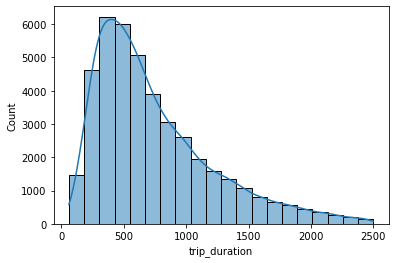

In [95]:
#ploting the distribution of the trip duration for the obove created plot
sns.histplot(df_trip_duration_2["trip_duration"], bins = 20, kde = True)

In [ ]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

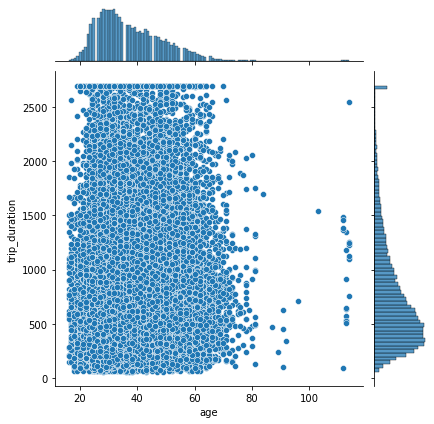

In [83]:
# jointplot to see relationship between trip duration and age
sns.jointplot(x='age',y='trip_duration',data=step_1)

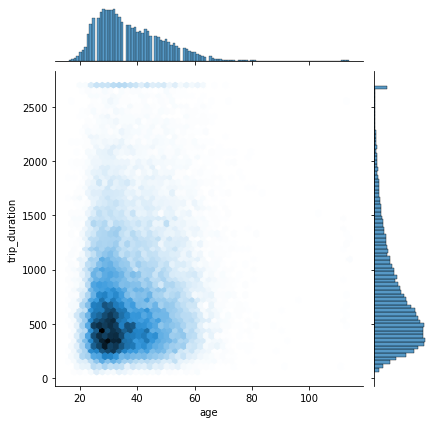

In [112]:
#same plot with kind = hex
sns.jointplot(x='age',y='trip_duration',kind='hex',data=df)

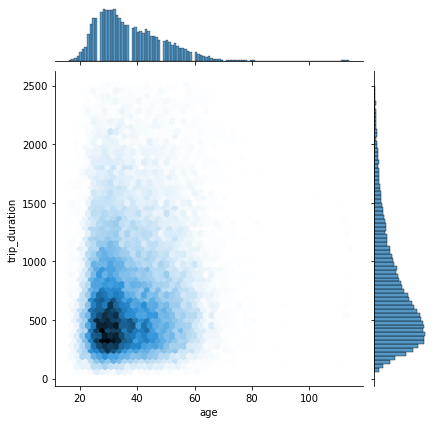

In [113]:
#same plot for trip duration <2500
sns.jointplot(x='age',y='trip_duration',kind='hex',data=df_trip_duration_2)



 Using a jointplot its clear to see, that there is a high density of data where the age is between 20 and 40 and trip duration is circa 500 (+-200). But it is hard to see if there is correlation.
 

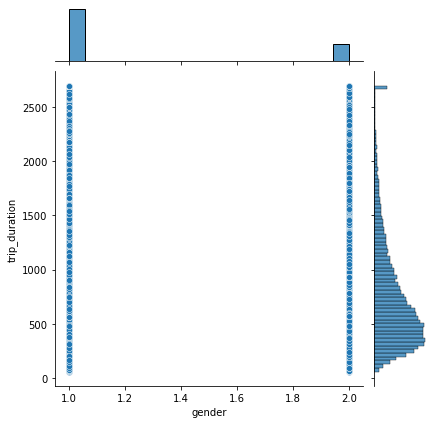

In [96]:
# jointplot to see relationship between gender and trip_duration
sns.jointplot(x='gender',y='trip_duration',data=step_1)

adding this plot it is clear to see that gender one has been using the bikesharing service more than 1 but its hard to see if there is a correlation

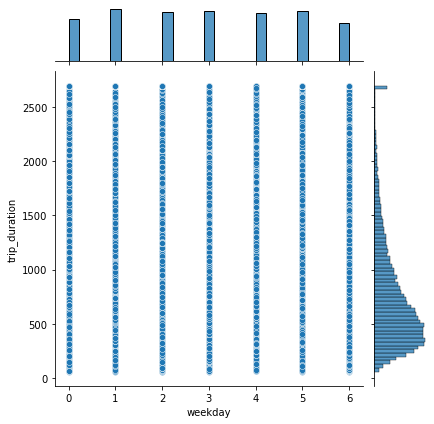

In [98]:
# jointplot to see relationship between trip duration and weekday
sns.jointplot(x='weekday',y='trip_duration',data=step_1)

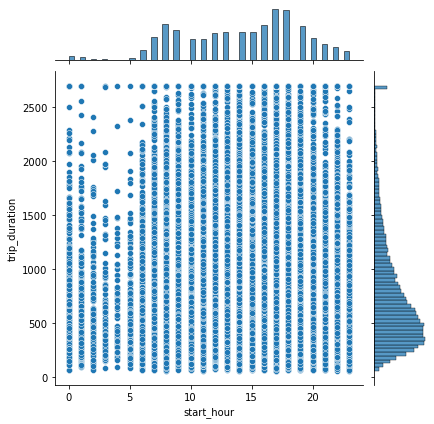

In [103]:
# jointplot to see relationship between trip duration and start hour
sns.jointplot(x='start_hour',y='trip_duration',data=df)

## QN5
State your hypothesis in a markdown cell within your Jupyter notebook.

if the customer is older, the trip duration ( average ) is shorter

## QN6
Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [118]:
X = df["age"].values.reshape(-1,1)

In [119]:
y = df["trip_duration"].values.reshape(-1,1)

In [117]:
y

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1191],
       [1050],
       [ 370]], dtype=int64)

## QN7
Split the data into two sets: a training set and a test set.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## QN8
Run a linear regression on the data.
First, fit the model you created to the training set.
Then, create a prediction for y on the test set.

In [121]:
# create a regression subject
lm = LinearRegression()

In [122]:
# Fit the regression to the trainset
lm.fit(X_train,y_train)

LinearRegression()

In [123]:
# predict the values of y using x
predictions = lm.predict( X_test)

## QN9
Create a plot that shows the regression line on the test set.

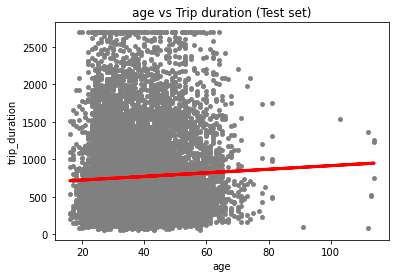

In [129]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, predictions, color='red', linewidth =3)
plot_test.title('age vs Trip duration (Test set)')
plot_test.xlabel('age')
plot_test.ylabel('trip_duration')
plot_test.show()

## QN10
Write your own interpretation of how well the line appears to fit the data in a markdown cell.

In [136]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
data.head(30)

,Actual,Predicted
0,878,833.375334
1,892,768.668180
2,2593,751.892251
3,884,735.116322
4,258,787.840670
5,1017,787.840670
6,833,744.702567
7,612,759.081935
8,610,811.806283
9,278,778.254425


In [137]:
#AS we can see in the plot the line doesnt present the real trip duration well.
#While the line shows a decrease of trips if the age is higher, the trip durations shows a higher trip durations as well as high density for age 20-60

As i said before it is hard to predict a correlation between the age and trip duration. It seems like a linear regression model is also not suitable to answer the hypthesis.

## QN11
Check the model performance statistics—MSE and R2.

In [134]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, predictions) # This is the mean squared error
r2 = r2_score(y_test, predictions) # This is the R2 score. 

In [135]:
print("MSE:", rmse)
print("R2 score:" , r2)

MSE: 279006.3602051958
R2 score: 0.0008264788458212102


## QN12
Compare the predicted y values with the actual y values in a dataframe.

In [138]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
data.head(30)

,Actual,Predicted
0,878,833.375334
1,892,768.668180
2,2593,751.892251
3,884,735.116322
4,258,787.840670
5,1017,787.840670
6,833,744.702567
7,612,759.081935
8,610,811.806283
9,278,778.254425


## QN13
Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.

The root mean squared error (MSE) is an estimator that measures the average of 
the squared difference between the estimated values and the true values. As we 
can see the MSE if way high. Which means the prediction of the model we crated
is not accurate.
In the table we created, its also clear to see that there is a big difference 
between the actual values and the predicted values.
The model we created is not accurate for this hypthesis and this data.